# Interactivity and Selections

Altair's interactivity and grammar of selections are one of its unique features among available plotting libraries.
In this section, we will walk through the variety of selection types that are available, and begin to practice creating interactive charts and dashboards.

There are three basic types of selections available:

- Interval Selection: ``alt.selection_interval()``
- Single Selection: ``alt.selection_single()``
- Multi Selection: ``alt.selection_multi()``

And we will cover four basic things that you can do with these selections

- Conditional encodings
- Scales
- Filters
- Domains

In [1]:
import altair as alt
from vega_datasets import data

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

RendererRegistry.enable('notebook')

## Basic Interactions: Panning, Zooming, Tooltips

The basic interactions that Altair makes available are panning, zooming, and tooltips.
This can be done in your chart without any use of the selection interface, using the
``interactive()`` shortcut method and the ``tooltip`` encoding.

For example, with our standard cars dataset, we can do the following:

In [2]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


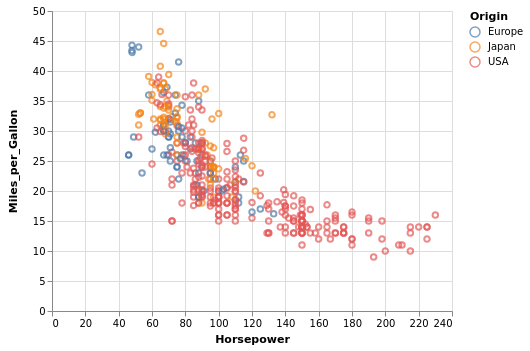

In [3]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin',
    tooltip='Name'
).interactive()

At this point, hovering over a point will bring up a tooltip with the name of the car model, and clicking/dragging/scrolling will pan and zoom on the plot.

## More Sophisticated Interaction: Selections

### Basic Selection Example: Interval

As an example of a selection, let's add an interval selection to a chart.

We'll start with our cannonical scatter plot:

In [4]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


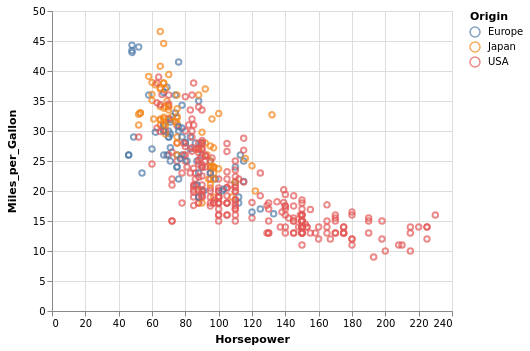

In [5]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin'
)

To add selection behavior to a chart, we create the selection object and add it to the chart's properties:

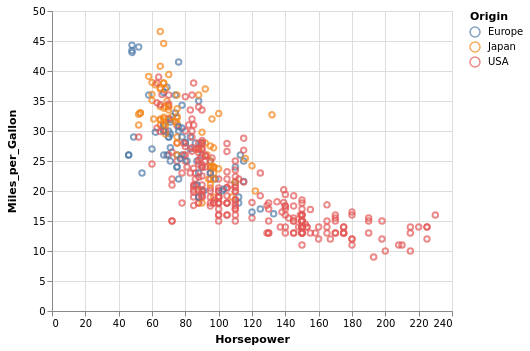

In [6]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin'
).properties(
    selection=interval
)

This adds an interaction to the plot that lets us select points on the plot; perhaps the most common use of a selection is to highlight points by conditioning their color on the result of the selection.

This can be done with ``alt.condition``:

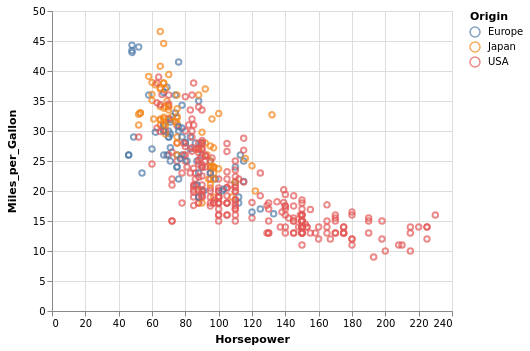

In [7]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

The ``alt.condition`` function takes three arguments: a selection object, a value to be applied to points within the selection, and a value to be applied to points outside the selection.
Here we use ``alt.value('lightgray')`` to make certain that the color is treated as an actual color, rather than the name of a data column.

#### Customizing the Interval selection

The ``alt.selection_interval()`` function takes a number of additional arguments; for example, by specifying ``encodings``, we can control whether the selection covers x, y, or both:

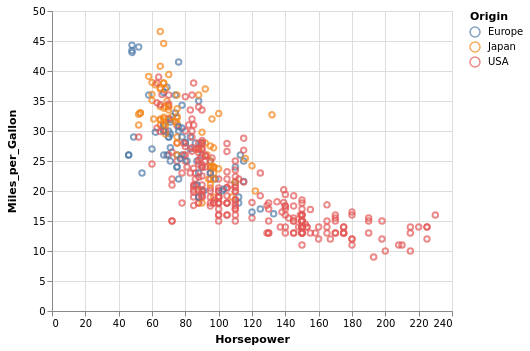

In [8]:
interval = alt.selection_interval(encodings=['x'])

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

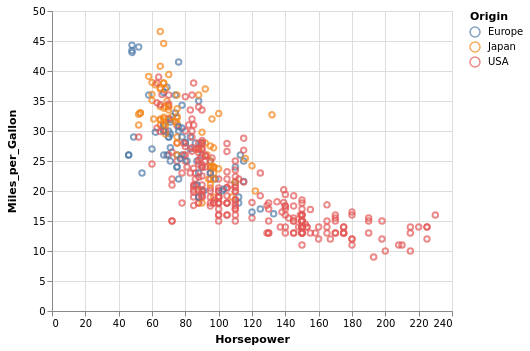

In [9]:
interval = alt.selection_interval(encodings=['y'])

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

The ``empty`` argument lets us control whether empty selections contain *all* values, or *none* of the values;
with ``empty='none'`` points are grayed-out by default:

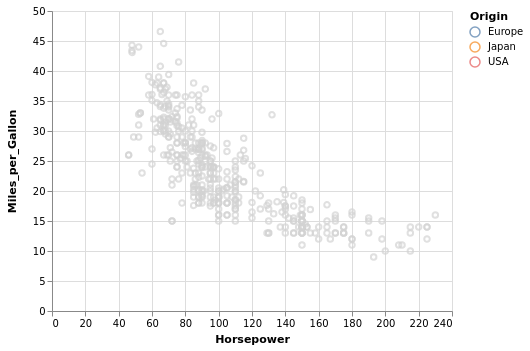

In [10]:
interval = alt.selection_interval(empty='none')

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

### Single Selections

The ``alt.selection_single()`` function allows the user to click on single chart objects to select them, one at a time.
We'll make the points a bit bigger so they are easier to click:

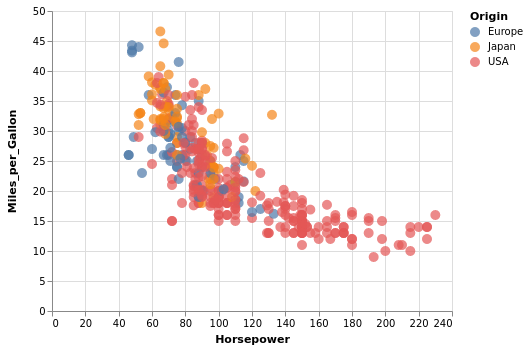

In [11]:
single = alt.selection_single()

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(single, 'Origin', alt.value('lightgray'))
).properties(
    selection=single
)

The single selection allows other behavior as well; for example, we can set ``nearest=True`` and ``on='mouseover'`` to update the highlight to the nearest point as we move the mouse:

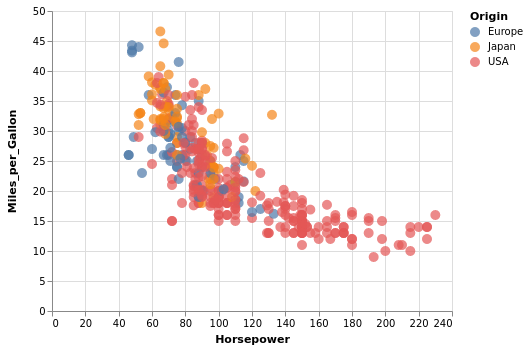

In [12]:
single = alt.selection_single(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(single, 'Origin', alt.value('lightgray'))
).properties(
    selection=single
)

### Multi Selection

The ``alt.selection_multi()`` function is quite similar to the ``single`` function, except it lets multiple points be selected at once, while holding the shift key:

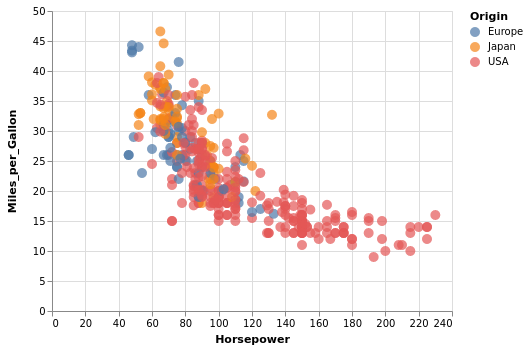

In [13]:
multi = alt.selection_multi()

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(multi, 'Origin', alt.value('lightgray'))
).properties(
    selection=multi
)

Options like ``on`` and ``nearest`` also work for multi selections:

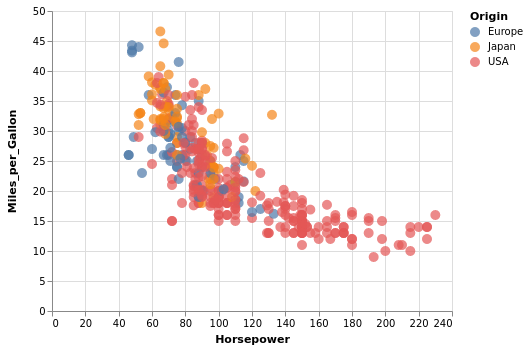

In [14]:
multi = alt.selection_multi(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(multi, 'Origin', alt.value('lightgray'))
).properties(
    selection=multi
)

## Selection Binding

Above we have seen how ``alt.condition`` can be used to bind the selection to different aspects of the chart.
Let's look at a few other ways that a selection can be used:

### Binding Scales
For an interval selection, another thing you can do with the selection is bind the selection region to the chart scales:

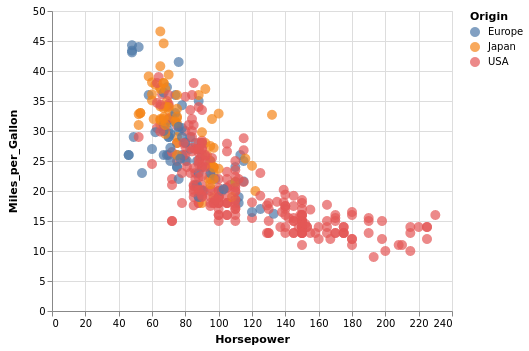

In [15]:
bind = alt.selection_interval(bind='scales')

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).properties(
    selection=bind
)

This is essentially what the ``chart.interactive()`` method does under the hood.

### Binding Scales to Other Domains

It is also possible to bind scales to other domains, which can be useful in creating

In [16]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


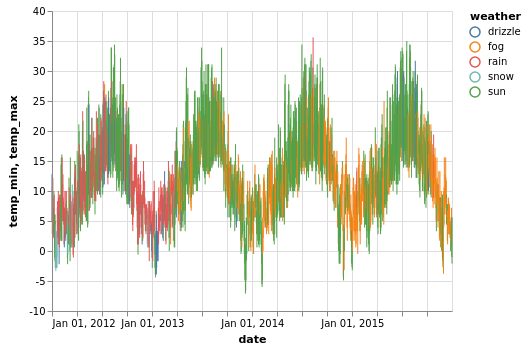

In [17]:
base = alt.Chart(weather).mark_rule().encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
)

base

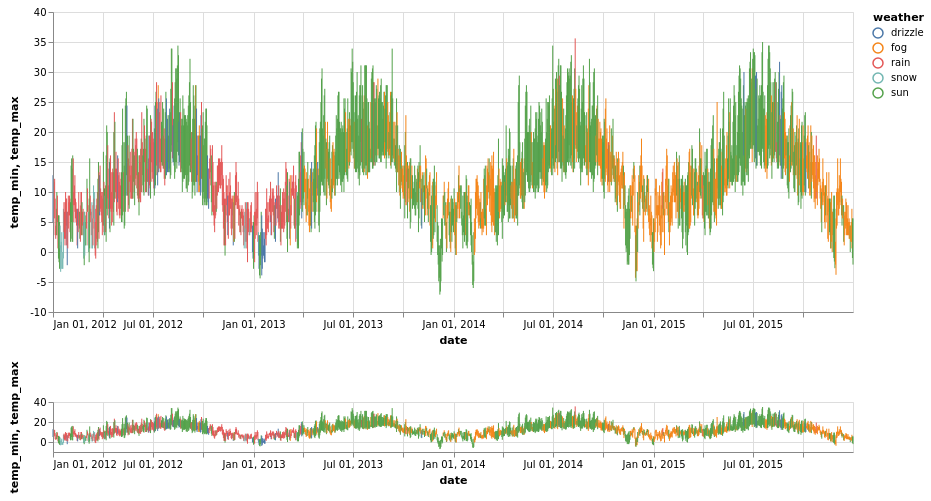

In [18]:
chart = base.properties(
    width=800,
    height=300
)

view = chart.properties(
    width=800,
    height=50
)

chart & view

Let's add an interval selection to the bottom chart that will control the domain of the top chart:

In [ ]:
interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(weather).mark_rule(size=2).encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
)

chart = base.properties(
    width=800,
    height=300
).encode(
    x=alt.X('date:T', scale=alt.Scale(domain=interval.ref()))
)

view = chart.properties(
    width=800,
    height=50,
    selection=interval
)

chart & view

### Filtering by Selection

In multi-panel charts, we can use the result of the selection to filter other views of the data.
For example, here is a scatter-plot along with a histogram

In [ ]:
interval = alt.selection_interval()

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

scatter & hist

Similarly, you can use a Multi selection to go the other way (allow clicking on the bar chart to filter the contents of the scatter plot.
We'll add this to the previous chart:

In [ ]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).transform_filter(
    click
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color=alt.condition(click, 'Origin', alt.value('lightgray'))
).properties(
    selection=click
)

scatter & hist

## Selections Summary

- Selection Types:

  - ``selection_interval()``
  - ``selection_single()``
  - ``selection_multi()``
  
- Bindings

  - bind scales: drag & scroll to interact with plot
  - bind scales on another chart
  - conditional encodings (e.g. color, size)
  - filter data

## Exercise: Selections

Here you have a chance to try this yourself! Choose one or more of the following interactive examples to create:

1. Using the cars data, create a scatter-plot where the *size* of the points becomes larger as you hover over them.

2. Using the cars data, create a two-panel histogram (say, miles per gallon counts in one panel, horsepower counts in the other) where you can drag your mouse to select data in the left panel to filter the data in the second panel.

3. Change the above scatter-plus-histogram example we did above so that
   a. you can pan and zoom on the scatterplot
   b. the histogram only reflects points that are *visible at the given moment*
   
4. Try something new!